In [1]:
import os               # import os to walk file path
import pandas as pd     # import pandas for dataframes
import numpy as np      
import json
import statistics
import time

from rouge import Rouge
import transformers
from tqdm.auto import tqdm

In [2]:
# blogs = ['DZone','DavidWalsh','DeveloperDotCom','GeeksForGeeks','SCAND','SDTimes']

In [3]:
# Relative path
path_to_data = 'rssDevData/'

# Names of 5 blog categories to import 
blogs = ['DavidWalsh','DeveloperDotCom']

# Identify key to blog text in JSON file
key = 'text'

# Initialize empty data frame
text_data = pd.DataFrame()

#Initialize counter to keep track of files that fail
files_not_read = 0

category_sizes = [] # To store number of blog articles by category
labels = [] # To store "true" labels ->  [0, 1, 2, 3, 4]
label = 0

for blog in blogs :
    current_blog_category_count = 0
    
    path_to_blogs = path_to_data + blog 
    
    for root, dir, files in os.walk(path_to_blogs) :
        # get list of only json files
        json_files = [pos_json for pos_json in files if pos_json.endswith('.json')]

        for j in json_files :
            with open(root + '/' + j, 'r') as f:
                try:
                    data = json.load(f)
                    if len(data[key]) > 200 :
                        try : # fails when there is more than one json object in the file 
                            text_data = pd.concat([text_data, pd.DataFrame(data, index=[0])], ignore_index=True) 
                            current_blog_category_count += 1 
                            labels.append(label) 
                        except : 
                            files_not_read += 1
                except:
                    print(j)
print('Files not read in: ', str(files_not_read))
print('Files read in: ', str(len(text_data)))
print(text_data.head())

5-web-design-trends-.json
locate-empty-directo.json
overview-of-spiral-s.json
Files not read in:  0
Files read in:  27
                                     header_title  \
0   Convert Fahrenheit to Celsius with JavaScript   
1     Create a Thumbnail From a Video with ffmpeg   
2                      CSS ::file-selector-button   
3                Customizing HTML Form Validation   
4  Detect Browser Bars Visibility with JavaScript   

                              date  \
0  Wed, 26 Oct 2022 10:19:49 +0000   
1  Tue, 25 Oct 2022 09:28:58 +0000   
2  Mon, 20 Feb 2023 09:50:57 +0000   
3  Mon, 09 Jan 2023 10:57:00 +0000   
4  Fri, 30 Dec 2022 01:36:35 +0000   

                                                text  \
0  The United States is one of the last bodies th...   
1  Creating a thumbnail to represent a video is a...   
2  We all love beautifully styled form controls b...   
3  Form validation has always been my least favor...   
4  It's one thing to know about what's in the bro... 

In [4]:
text_data.head()

,header_title,date,text,summary,url
0,Convert Fahrenheit to Celsius with JavaScript,"Wed, 26 Oct 2022 10:19:49 +0000",The United States is one of the last bodies th...,The article discusses the importance of provid...,https://davidwalsh.name/fahrenheit-celsius-jav...
1,Create a Thumbnail From a Video with ffmpeg,"Tue, 25 Oct 2022 09:28:58 +0000",Creating a thumbnail to represent a video is a...,The article discusses several topics related t...,https://davidwalsh.name/create-thumbnail-ffmpeg
2,CSS ::file-selector-button,"Mon, 20 Feb 2023 09:50:57 +0000",We all love beautifully styled form controls b...,This article discusses various web development...,https://davidwalsh.name/css-file-selector-button
3,Customizing HTML Form Validation,"Mon, 09 Jan 2023 10:57:00 +0000",Form validation has always been my least favor...,The article discusses how to control native fo...,https://davidwalsh.name/html5-validation
4,Detect Browser Bars Visibility with JavaScript,"Fri, 30 Dec 2022 01:36:35 +0000",It's one thing to know about what's in the bro...,The article discusses how developers can gain ...,https://davidwalsh.name/detect-browser-bars


In [5]:
text_data.isnull().sum()

header_title    0
date            0
text            0
summary         0
url             0
dtype: int64

In [6]:
text_data = text_data.dropna()
text_data.reset_index(drop=True, inplace=True)

In [7]:
text_data.isnull().sum()

header_title    0
date            0
text            0
summary         0
url             0
dtype: int64

In [8]:
text_data.head()

,header_title,date,text,summary,url
0,Convert Fahrenheit to Celsius with JavaScript,"Wed, 26 Oct 2022 10:19:49 +0000",The United States is one of the last bodies th...,The article discusses the importance of provid...,https://davidwalsh.name/fahrenheit-celsius-jav...
1,Create a Thumbnail From a Video with ffmpeg,"Tue, 25 Oct 2022 09:28:58 +0000",Creating a thumbnail to represent a video is a...,The article discusses several topics related t...,https://davidwalsh.name/create-thumbnail-ffmpeg
2,CSS ::file-selector-button,"Mon, 20 Feb 2023 09:50:57 +0000",We all love beautifully styled form controls b...,This article discusses various web development...,https://davidwalsh.name/css-file-selector-button
3,Customizing HTML Form Validation,"Mon, 09 Jan 2023 10:57:00 +0000",Form validation has always been my least favor...,The article discusses how to control native fo...,https://davidwalsh.name/html5-validation
4,Detect Browser Bars Visibility with JavaScript,"Fri, 30 Dec 2022 01:36:35 +0000",It's one thing to know about what's in the bro...,The article discusses how developers can gain ...,https://davidwalsh.name/detect-browser-bars


In [9]:
text_data['text'][0]

'The United States is one of the last bodies that refuses to implement the Celsius temperature standard. Why? Because we\'re arrogant and feel like we don\'t need to change. With that said, if you code for users outside the US, it\'s important to provide localized weather data to users. Let\'s took at how you can convert between Fahrenheit and Celsius.The formula to convert Fahrenheit to Celsius is:The following function converts Fahrenheit to Celsius:The formula to convert Celsius to Fahrenheit is:The following function converts Celsius to Fahrenheit:Temperature conversion is one of those things that\'s difficult to do in your head due to the somewhat complex formula.  If you have a site that reflects weather data, keep these handy functions nearby!You\'ve probably heard the talk around the water cooler about how promises are the future. All of the cool kids are using them, but you don\'t see what makes them so special. Can\'t you just use a callback? What\'s the big deal? In this art

In [10]:
import sumy
from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer 
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.lex_rank import LexRankSummarizer

from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

In [11]:
import math
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\msalehi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
# def count_sentences(text):
#     # Tokenize the text into sentences
#     sentences = nltk.sent_tokenize(text)
#     # Return the count of sentences
#     return len(sentences)

In [13]:
# numSentences = count_sentences(text_data['text'][0])

In [14]:
# if numSentences > 40 :
#     numSentences = math.ceil(numSentences*0.1)
# elif numSentences > 10 :
#     numSentences = math.ceil(numSentences*0.5)
# else :
#     numSentences = min(numSentences, math.ceil(numSentences*0.8))

In [15]:
def numSentences(text):
    # Tokenize the text into sentences
    sentences = nltk.sent_tokenize(text)
    # Return the count of sentences
    numSentences = len(sentences)


    if numSentences > 40 :
        numSentences = math.ceil(numSentences*0.1)
    elif numSentences > 10 :
        numSentences = math.ceil(numSentences*0.5)
    else :
        numSentences = min(numSentences, math.ceil(numSentences*0.8))
    return numSentences

In [16]:
def summarizator_LexRank(text):
    start = time.time()
    SENTENCES_COUNT = numSentences(text)
    language = 'english'

    sumario_summy = []
    parser = PlaintextParser.from_string(text, Tokenizer(language))
    stemmer = Stemmer(language)
    summarizer = LexRankSummarizer(stemmer)
    summarizer.stop_words = get_stop_words(language)
    summary = []
        
    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        summary.append(str(sentence))

    summary = ' '.join(summary)
    sumario_summy.append(summary)
    end = time.time()
    LexRank_time = (end - start)
        
#     return " ".join(sumario_summy)
    return (LexRank_time,sumario_summy)

In [17]:
summarizator_LexRank(text_data['text'][1])[1]

["Let's view how we can create a preview thumbnail from a video!Developers can use `ffmpeg, an incredible open source media utility, to create a thumbnail. To create a thumbnail from the first frame of a video, execute the following command:Providing a video thumbnail is a great tool convert images into video views. You don't need fancy software and manual labor to create thumbnails -- use ffmpeg!Firefox OS is all over the tech news and for good reason: Â\xa0Mozilla's finally givenÂ\xa0web developers the platform that they need to create apps the way they've been creating them for years -- with CSS, HTML, and JavaScript. CSS filters provide a method for modifying the rendering of a basic DOM element, image, or video. CSS filters allow for blurring, warping, and modifying the color intensity of elements. Â\xa0The element is almost unstylable, looks different across platforms, has had inconsistent value access, and disaster that is the result of multiple=true is, well, a disaster. Â\xa0N

In [18]:
def summarizator_LexRank(text):
    start = time.time()
    SENTENCES_COUNT = numSentences(text)
    language = 'english'

    sumario_summy = []
    parser = PlaintextParser.from_string(text, Tokenizer(language))
    stemmer = Stemmer(language)
    summarizer = LexRankSummarizer(stemmer)
    summarizer.stop_words = get_stop_words(language)
    summary = []
        
    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        summary.append(str(sentence))

    summary = ' '.join(summary)
    sumario_summy.append(summary)
    end = time.time()
    LexRank_time = (end - start)
        
#     return " ".join(sumario_summy)
    return (LexRank_time,sumario_summy)

In [19]:
# summarizator_LexRank(text_data['text'][0])[0]

In [20]:
text_data["Sumy_LexRank"] = text_data["text"].apply(summarizator_LexRank)

In [21]:
def summarizator_Luhn(text):
    start = time.time()
    SENTENCES_COUNT = numSentences(text)
    language = 'english'

    sumario_summy = []
    parser = PlaintextParser.from_string(text, Tokenizer(language))
    stemmer = Stemmer(language)
    summarizer = LuhnSummarizer(stemmer)
    summarizer.stop_words = get_stop_words(language)
    summary = []
        
    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        summary.append(str(sentence))

    summary = ' '.join(summary)
    sumario_summy.append(summary)
    end = time.time()
    Luhn_time = (end - start)
        
#     return " ".join(sumario_summy)
    return (Luhn_time,sumario_summy)

In [22]:
text_data["Sumy_Luhn"] = text_data["text"].apply(summarizator_Luhn)

In [23]:
def summarizator_Lsa(text):
    start = time.time()
    SENTENCES_COUNT = numSentences(text)
    language = 'english'

    sumario_summy = []
    parser = PlaintextParser.from_string(text, Tokenizer(language))
    stemmer = Stemmer(language)
    summarizer = LsaSummarizer(stemmer)
    summarizer.stop_words = get_stop_words(language)
    summary = []
        
    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        summary.append(str(sentence))

    summary = ' '.join(summary)
    sumario_summy.append(summary)
    end = time.time()
    Lsa_time = (end - start)
        
#     return " ".join(sumario_summy)
    return (Lsa_time,sumario_summy)

In [24]:
text_data["Sumy_Lsa"] = text_data["text"].apply(summarizator_Lsa)

In [25]:
def summarizator_TextRank(text):
    start = time.time()
    SENTENCES_COUNT = numSentences(text)
    language = 'english'

    sumario_summy = []
    parser = PlaintextParser.from_string(text, Tokenizer(language))
    stemmer = Stemmer(language)
    summarizer = TextRankSummarizer(stemmer)
    summarizer.stop_words = get_stop_words(language)
    summary = []
        
    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        summary.append(str(sentence))

    summary = ' '.join(summary)
    sumario_summy.append(summary)
    end = time.time()
    TextRank_time = (end - start)
        
#     return " ".join(sumario_summy)
    return (TextRank_time,sumario_summy)

In [26]:
text_data["Sumy_TextRank"] = text_data["text"].apply(summarizator_TextRank)

In [27]:
text_data.head()

,header_title,date,text,summary,url,Sumy_LexRank,Sumy_Luhn,Sumy_Lsa,Sumy_TextRank
0,Convert Fahrenheit to Celsius with JavaScript,"Wed, 26 Oct 2022 10:19:49 +0000",The United States is one of the last bodies th...,The article discusses the importance of provid...,https://davidwalsh.name/fahrenheit-celsius-jav...,"(0.0, [Because we're arrogant and feel like we...","(0.0, [The United States is one of the last bo...","(0.0, [The United States is one of the last bo...","(0.008727312088012695, [Because we're arrogant..."
1,Create a Thumbnail From a Video with ffmpeg,"Tue, 25 Oct 2022 09:28:58 +0000",Creating a thumbnail to represent a video is a...,The article discusses several topics related t...,https://davidwalsh.name/create-thumbnail-ffmpeg,"(0.0, [Let's view how we can create a preview ...","(0.012937545776367188, [I previously created a...","(0.0, [Creating a thumbnail to represent a vid...","(0.0015697479248046875, [Creating a thumbnail ..."
2,CSS ::file-selector-button,"Mon, 20 Feb 2023 09:50:57 +0000",We all love beautifully styled form controls b...,This article discusses various web development...,https://davidwalsh.name/css-file-selector-button,"(0.015638113021850586, [We all love beautifull...","(0.0019676685333251953, [We all love beautiful...","(0.017915010452270508, [We all love beautifull...","(0.0, [We all love beautifully styled form con..."
3,Customizing HTML Form Validation,"Mon, 09 Jan 2023 10:57:00 +0000",Form validation has always been my least favor...,The article discusses how to control native fo...,https://davidwalsh.name/html5-validation,"(0.0019567012786865234, [You need to duplicate...","(0.0, [You need to duplicate validation on bot...","(0.006000995635986328, [You need to duplicate ...","(0.00857686996459961, [Form validation has alw..."
4,Detect Browser Bars Visibility with JavaScript,"Fri, 30 Dec 2022 01:36:35 +0000",It's one thing to know about what's in the bro...,The article discusses how developers can gain ...,https://davidwalsh.name/detect-browser-bars,"(0.0, [We've gotten past detecting which brows...","(0.0, [It's one thing to know about what's in ...","(0.00499415397644043, [We've gotten past detec...","(0.006668806076049805, [It's one thing to know..."


In [28]:
text_data.isnull().sum()

header_title     0
date             0
text             0
summary          0
url              0
Sumy_LexRank     0
Sumy_Luhn        0
Sumy_Lsa         0
Sumy_TextRank    0
dtype: int64

In [29]:
len(text_data['Sumy_TextRank'][0][1][0])

1829

In [30]:
len(text_data['Sumy_TextRank'][1][1][0])

1280

In [31]:
len(text_data['Sumy_TextRank'][2][1][0])

1219

In [32]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, AutoModelWithLMHead
import torch
import time

In [33]:
import transformers
print(transformers.__version__)

4.30.1


# T5

In [34]:
model = AutoModelForSeq2SeqLM.from_pretrained('t5-base')

In [35]:
tokenizer = AutoTokenizer.from_pretrained("t5-base")

C:\Users\msalehi\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\t5\tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [36]:
def T5(text):
    start = time.time()
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512)
    outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    decoded_T5 = tokenizer.decode(outputs[0])
    end = time.time()
    t5_time = (end - start)
#     print(t5_time)
    return(t5_time, decoded_T5)

In [37]:
T5(text_data['Sumy_TextRank'][0][1][0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


(3.272739887237549,
 "<pad> if you code for users outside the us, it's important to provide localized weather data. if you code for users outside the us, it's important to provide localized weather data.</s>")

In [38]:
df_Hyb = pd.DataFrame()
df_Hyb['Sumy_TextRank'] = text_data['Sumy_TextRank']

In [39]:
df_Hyb.head()

,Sumy_TextRank
0,"(0.008727312088012695, [Because we're arrogant..."
1,"(0.0015697479248046875, [Creating a thumbnail ..."
2,"(0.0, [We all love beautifully styled form con..."
3,"(0.00857686996459961, [Form validation has alw..."
4,"(0.006668806076049805, [It's one thing to know..."


In [40]:
df_Hyb['List_Sumy_TextRank'] = [x[1][0] for x in text_data['Sumy_TextRank']]

In [41]:
df_Hyb['List_Sumy_TextRank'][0] 

'Because we\'re arrogant and feel like we don\'t need to change. With that said, if you code for users outside the US, it\'s important to provide localized weather data to users. Let\'s took at how you can convert between Fahrenheit and Celsius.The formula to convert Fahrenheit to Celsius is:The following function converts Fahrenheit to Celsius:The formula to convert Celsius to Fahrenheit is:The following function converts Celsius to Fahrenheit:Temperature conversion is one of those things that\'s difficult to do in your head due to the somewhat complex formula. What\'s the big deal? In this article, we\'ll... One CSS effect somewhere in between is the CSS flip effect, whereby there\'s...Every UI framework has the same set of widgets which have become almost essential toÂ\xa0modern sites: modals, tooltips, button varieties, and notifications. Â\xa0One problem I find is each site having their own widget colors, styles, and more -- users don\'t get a consistent experience. Â\xa0Apparentl

In [42]:
df_Hyb['T5']= df_Hyb['List_Sumy_TextRank'].apply(lambda x:T5(x))

# BERT

In [43]:
model = AutoModelWithLMHead.from_pretrained('bert-base-cased')
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

C:\Users\msalehi\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\auto\modeling_auto.py:1362: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from

In [44]:
def BERT(text):
    start = time.time()
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=100)
    outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    decoded_BERT = tokenizer.decode(outputs[0])
    end = time.time()
    BERT_time = (end-start)
    return(BERT_time, decoded_BERT)

In [45]:
df_Hyb['BERT']= df_Hyb['List_Sumy_TextRank'].apply(lambda x:BERT(x))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


# GPT

In [46]:
model = AutoModelWithLMHead.from_pretrained('openai-gpt')
tokenizer = AutoTokenizer.from_pretrained("openai-gpt")

C:\Users\msalehi\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\auto\modeling_auto.py:1362: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
Some weights of OpenAIGPTLMHeadModel were not initialized from the model checkpoint at openai-gpt and are newly initialized: ['position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [47]:
def GPT(text):
    start = time.time()
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=149)
    outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    decoded_GPT = tokenizer.decode(outputs[0])
    end = time.time()
    GPT_time = (end - start)
    return(GPT_time, decoded_GPT)

In [48]:
df_Hyb['GPT']= df_Hyb['List_Sumy_TextRank'].apply(lambda x:GPT(x))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


# DistilBERT

In [49]:
model = AutoModelWithLMHead.from_pretrained('distilgpt2')
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")

C:\Users\msalehi\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\auto\modeling_auto.py:1362: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


In [50]:
def DistilBERT(text):
    start = time.time()
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=149)
    outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    decoded_DistilBERT = tokenizer.decode(outputs[0])
    end = time.time()
    DistilBERT_time = (end - start)
    return(DistilBERT_time, decoded_DistilBERT)

In [51]:
df_Hyb['DistilBERT']= df_Hyb['List_Sumy_TextRank'].apply(lambda x:DistilBERT(x))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your

# GPT2

In [52]:
model = AutoModelWithLMHead.from_pretrained('gpt2')
tokenizer = AutoTokenizer.from_pretrained("gpt2")

C:\Users\msalehi\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\auto\modeling_auto.py:1362: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


In [53]:
def GPT2(text):
    start = time.time()
    inputs = tokenizer.encode("summarize: " + text_data.iloc[20]['text'], return_tensors="pt", max_length=149)
    outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    decoded_GPT2 = tokenizer.decode(outputs[0])
    end = time.time()
    GPT2_time = (end - start)
    return(GPT2_time, decoded_GPT2)

In [54]:
df_Hyb['GPT2']= df_Hyb['List_Sumy_TextRank'].apply(lambda x:GPT2(x))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your

## Rouge Score

In [55]:
df_Hyb['summary'] = text_data['summary']

In [56]:
df_Hyb.head()

,Sumy_TextRank,List_Sumy_TextRank,T5,BERT,GPT,DistilBERT,GPT2,summary
0,"(0.008727312088012695, [Because we're arrogant...",Because we're arrogant and feel like we don't ...,"(3.3088467121124268, <pad> if you code for use...","(12.936628103256226, [CLS] summarize : Because...","(0.3818371295928955, summarize : because we're...","(0.25107693672180176, summarize: Because we're...","(0.4311544895172119, summarize: Machine Vision...",The article discusses the importance of provid...
1,"(0.0015697479248046875, [Creating a thumbnail ...",Creating a thumbnail to represent a video is a...,"(2.8515841960906982, <pad> developers can use ...","(12.982860326766968, [CLS] summarize : Creatin...","(0.41689205169677734, summarize : creating a t...","(0.2378535270690918, summarize: Creating a thu...","(0.4167289733886719, summarize: Machine Vision...",The article discusses several topics related t...
2,"(0.0, [We all love beautifully styled form con...",We all love beautifully styled form controls b...,"(4.611579895019531, <pad> the jQuery JavaScrip...","(12.915395021438599, [CLS] summarize : We all ...","(0.3918273448944092, summarize : we all love b...","(0.2474985122680664, summarize: We all love be...","(0.4450044631958008, summarize: Machine Vision...",This article discusses various web development...
3,"(0.00857686996459961, [Form validation has alw...",Form validation has always been my least favor...,"(3.538940191268921, <pad> to aid form validati...","(12.96420168876648, [CLS] summarize : Form val...","(0.4256575107574463, summarize : form validati...","(0.25385451316833496, summarize: Form validati...","(0.42593979835510254, summarize: Machine Visio...",The article discusses how to control native fo...
4,"(0.006668806076049805, [It's one thing to know...",It's one thing to know about what's in the bro...,"(5.1151275634765625, <pad> we've gotten past d...","(12.949451208114624, [CLS] summarize : It's on...","(0.4005093574523926, summarize : it's one thin...","(0.25842881202697754, summarize: It's one thin...","(0.45431089401245117, summarize: Machine Visio...",The article discusses how developers can gain ...


In [57]:
from rouge import Rouge

In [58]:
df_Hyb['T5_list'] = [x[1] for x in df_Hyb['T5']]

In [59]:
rouge = Rouge()

# Compare chatgpt summary with T5 using Rouge measure

scores1 = rouge.get_scores(df_Hyb["summary"], df_Hyb['T5_list'])
df_result1 = pd.DataFrame(scores1)
df_result1.head()

,rouge-1,rouge-2,rouge-l
0,"{'r': 0.35294117647058826, 'p': 0.076923076923...","{'r': 0.11764705882352941, 'p': 0.018867924528...","{'r': 0.35294117647058826, 'p': 0.076923076923..."
1,"{'r': 0.5416666666666666, 'p': 0.1688311688311...","{'r': 0.19230769230769232, 'p': 0.045871559633...","{'r': 0.375, 'p': 0.11688311688311688, 'f': 0...."
2,"{'r': 0.37142857142857144, 'p': 0.178082191780...","{'r': 0.02631578947368421, 'p': 0.011235955056...","{'r': 0.2857142857142857, 'p': 0.1369863013698..."
3,"{'r': 0.6666666666666666, 'p': 0.2898550724637...","{'r': 0.24242424242424243, 'p': 0.08, 'f': 0.1...","{'r': 0.6, 'p': 0.2608695652173913, 'f': 0.363..."
4,"{'r': 0.43243243243243246, 'p': 0.216216216216...","{'r': 0.23255813953488372, 'p': 0.104166666666...","{'r': 0.40540540540540543, 'p': 0.202702702702..."


In [60]:
df_Hyb['BERT_list'] = [x[1] for x in df_Hyb['BERT']]

In [61]:
# Compare chatgpt summary with BERT using Rouge measure

scores2 = rouge.get_scores(df_Hyb["summary"], df_Hyb["BERT_list"])
df_result2 = pd.DataFrame(scores2)
# df_result2.head()

In [62]:
df_Hyb['DistilBERT_list'] = [x[1] for x in df_Hyb['DistilBERT']]

In [63]:
# Compare chatgpt summary with DistilBERT using Rouge measure

scores3 = rouge.get_scores(df_Hyb["summary"], df_Hyb["DistilBERT_list"])
df_result3 = pd.DataFrame(scores3)
# df_result3.head()

In [64]:
df_Hyb['GPT_list'] = [x[1] for x in df_Hyb['GPT']]

In [65]:
# # Compare chatgpt summary with GPT using Rouge measure

scores4 = rouge.get_scores(df_Hyb["summary"], df_Hyb["GPT_list"])
df_result4 = pd.DataFrame(scores4)
# df_result4.head()

In [66]:
df_Hyb['GPT2_list'] = [x[1] for x in df_Hyb['GPT2']]

In [67]:
# Compare chatgpt summary with GPT2 using Rouge measure

scores5 = rouge.get_scores(df_Hyb["summary"], df_Hyb["GPT2_list"])
df_result5 = pd.DataFrame(scores5)
# df_result5.head()

In [68]:
# Create a dataframe and Calculate the mean value of Rouge measure for T5

f_rouge_1_T5 = []
f_rouge_2 = []
f_rouge_l = []

for i in range(len(df_result1)):
    r = df_result1['rouge-1'][i]['f']
    f_rouge_1_T5.append(r)
    k = df_result1['rouge-2'][i]['f']
    f_rouge_2.append(k)
    h = df_result1['rouge-l'][i]['f']
    f_rouge_l.append(h)

In [69]:
# Create a dataframe and Calculate the mean value of Rouge measure for BERT

f_rouge_1_BERT = []
f_rouge_2 = []
f_rouge_l = []

for i in range(len(df_result2)):
    r = df_result2['rouge-1'][i]['f']
    f_rouge_1_BERT.append(r)
    k = df_result2['rouge-2'][i]['f']
    f_rouge_2.append(k)
    h = df_result2['rouge-l'][i]['f']
    f_rouge_l.append(h)

In [70]:
# Create a dataframe and Calculate the mean value of Rouge measure for T5

f_rouge_1_T5 = []
f_rouge_2 = []
f_rouge_l = []

for i in range(len(df_result1)):
    r = df_result1['rouge-1'][i]['f']
    f_rouge_1_T5.append(r)
    k = df_result1['rouge-2'][i]['f']
    f_rouge_2.append(k)
    h = df_result1['rouge-l'][i]['f']
    f_rouge_l.append(h)

In [71]:
# Create a dataframe and Calculate the mean value of Rouge measure for BERT

f_rouge_1_BERT = []
f_rouge_2 = []
f_rouge_l = []

for i in range(len(df_result2)):
    r = df_result2['rouge-1'][i]['f']
    f_rouge_1_BERT.append(r)
    k = df_result2['rouge-2'][i]['f']
    f_rouge_2.append(k)
    h = df_result2['rouge-l'][i]['f']
    f_rouge_l.append(h)

In [72]:
# Create a dataframe and Calculate the mean value of Rouge measure for DistilBERT

f_rouge_1_DistilBERT = []
f_rouge_2_DistilBERT = []
f_rouge_l_DistilBERT = []

for i in range(len(df_result3)):
    r = df_result3['rouge-1'][i]['f']
    f_rouge_1_DistilBERT.append(r)
    k = df_result3['rouge-2'][i]['f']
    f_rouge_2_DistilBERT.append(k)
    h = df_result3['rouge-l'][i]['f']
    f_rouge_l_DistilBERT.append(h)

In [73]:
# Create a dataframe and Calculate the mean value of Rouge measure for GPT

f_rouge_1_GPT = []
f_rouge_2 = []
f_rouge_l = []

for i in range(len(df_result4)):
    r = df_result4['rouge-1'][i]['f']
    f_rouge_1_GPT.append(r)
    k = df_result4['rouge-2'][i]['f']
    f_rouge_2.append(k)
    h = df_result4['rouge-l'][i]['f']
    f_rouge_l.append(h)

In [74]:
# Create a dataframe and Calculate the mean value of Rouge measure for GPT2

f_rouge_1_GPT2 = []
f_rouge_2 = []
f_rouge_l = []

for i in range(len(df_result5)):
    r = df_result5['rouge-1'][i]['f']
    f_rouge_1_GPT2.append(r)
    k = df_result5['rouge-2'][i]['f']
    f_rouge_2.append(k)
    h = df_result5['rouge-l'][i]['f']
    f_rouge_l.append(h)

In [75]:
# Create a dataframe of f_rouge for all methods for each row

data = {'f_rouge_1_T5':f_rouge_1_T5,'f_rouge_1_BERT':f_rouge_1_BERT
        ,'f_rouge_1_GPT':f_rouge_1_GPT, 'f_rouge_1_DistilBERT':f_rouge_1_DistilBERT,'f_rouge_1_GPT2': f_rouge_1_GPT2}
# columns = ['f_rouge_1_LexRank','f_rouge_1_Lsa','f_rouge_1_TextRank','f_rouge_1_Luhn']
df =pd.DataFrame(data)
df.head()

,f_rouge_1_T5,f_rouge_1_BERT,f_rouge_1_GPT,f_rouge_1_DistilBERT,f_rouge_1_GPT2
0,0.126316,0.192000,0.197183,0.248447,0.141935
1,0.257426,0.210526,0.226415,0.217949,0.168831
2,0.240741,0.232258,0.246914,0.283951,0.173333
3,0.404040,0.246575,0.293333,0.309677,0.205479
4,0.288288,0.323077,0.303797,0.310559,0.211921


In [76]:
# Statistical info of df

df.describe()

,f_rouge_1_T5,f_rouge_1_BERT,f_rouge_1_GPT,f_rouge_1_DistilBERT,f_rouge_1_GPT2
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.286788,0.296742,0.307851,0.338024,0.174475
std,0.079145,0.083674,0.078272,0.088610,0.045971
min,0.126316,0.148148,0.197183,0.217949,0.112676
25%,0.246244,0.233012,0.247640,0.278359,0.148360
50%,0.280255,0.285714,0.293333,0.305882,0.166667
75%,0.336992,0.346656,0.360689,0.413484,0.188799
max,0.470588,0.459259,0.490323,0.509804,0.358974


In [77]:
# Import libraries for visualization

import seaborn as sns
import matplotlib.pyplot as plt

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'f_rouge_1_T5'),
  Text(1, 0, 'f_rouge_1_BERT'),
  Text(2, 0, 'f_rouge_1_GPT'),
  Text(3, 0, 'f_rouge_1_DistilBERT'),
  Text(4, 0, 'f_rouge_1_GPT2')])

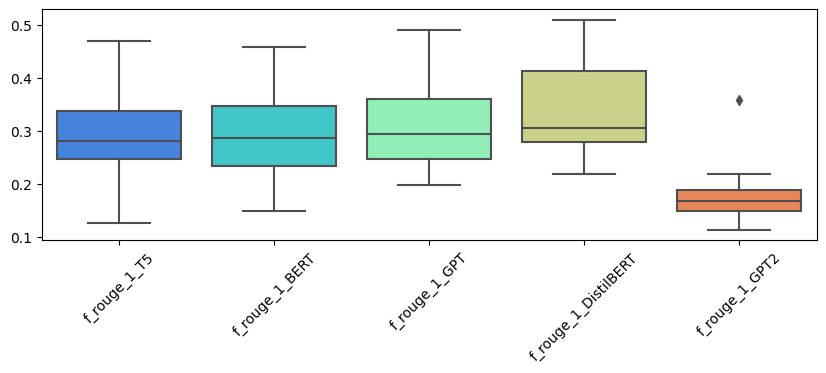

In [78]:
# Create a boxplot for different methods

plt.figure(figsize=(10, 3))
sns.boxplot(data=df, palette='rainbow')
plt.xticks(rotation=45)

In [79]:
# df.to_csv('df_Hybrid.csv',index=False)

In [80]:
df1 = pd.read_csv('df_Ex.csv')
df2 = pd.read_csv('df_Abs.csv')
df3 = pd.read_csv('df_Hybrid.csv')

In [81]:
df1.columns

Index(['f_rouge_1_LexRank', 'f_rouge_1_Lsa', 'f_rouge_1_TextRank',
       'f_rouge_1_Luhn'],
      dtype='object')

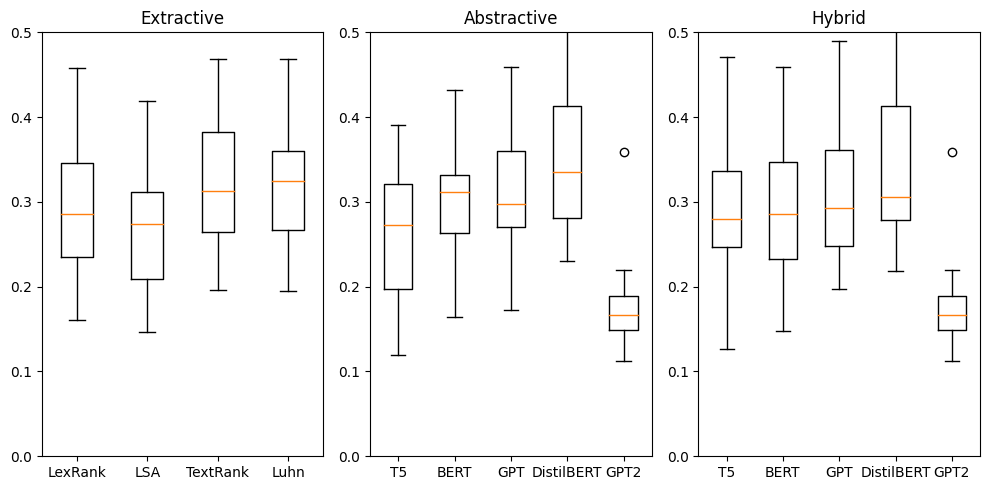

In [82]:
# Create a figure and subplots with a 1-row, 3-column grid
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))


# Set the y-axis limits for all subplots
ymin = 0  # Specify the desired minimum y-axis value
ymax = 0.5   # Specify the desired maximum y-axis value 

# Plot the boxplots on each subplot
x1labels =['LexRank','LSA','TextRank','Luhn']
axes[0].boxplot(df1,labels=x1labels)
axes[0].set_title('Extractive')
axes[0].set_ylim(ymin, ymax)  # Set the y-axis limits

x2labels =['T5','BERT','GPT','DistilBERT','GPT2']
axes[1].boxplot(df2,labels=x2labels)
axes[1].set_title('Abstractive')
axes[1].set_ylim(ymin, ymax)  # Set the y-axis limits

x3labels =['T5','BERT','GPT','DistilBERT','GPT2']
axes[2].boxplot(df3,labels=x3labels)
axes[2].set_title('Hybrid')
axes[2].set_ylim(ymin, ymax)  # Set the y-axis limits


# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()
